In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import matplotlib.ticker as ticker
import re
sns.set_style("darkgrid")


In [ ]:
pattern = '(?s:.*)(ssl|init|lfs|delay)'
dataset = 'RBF_moderate'
method = 'NB'


In [4]:
# logs = logs[logs.columns[:-200]]
# logs.to_csv(os.path.join("logs_formatted",dataset,f"{method}.csv"),index = False)

# plot for threshold


In [5]:
def save_table_resluts(logs,title,thresholds= [0.9,0.8,0.7],agg_type = "bins",metric = 'Acc',types = ['ssl','delay','lfs','init']):
    table = logs[logs.apply(lambda x: x['type'] in types and x['threshold'] in thresholds, axis =1 )][['type','probability','threshold','B_1','B_45','B_50']]
    for col in ['B_1','B_45','B_50']:
        table[col] = table[col].apply(lambda x : '{:.2f}'.format(x))
    table.to_csv(f"{title}_{agg_type}_{metric}_{'_'.join(types)}.pdf")
    return table

In [6]:
def plot_bins_diff_thresholds(logs,thresholds,title,agg_type = "bins",metric = 'Acc',types = ['ssl','delay'],with_saving = False, save_table = False):
    to_keep = ['type','probability','threshold']
    if agg_type == 'bins':
        to_keep.extend([x for x in logs.columns if x.startswith("B_")])
    elif agg_type == 'labelled instances':
        to_keep.extend([x for x in logs.columns if x.startswith("m_")])
    partial_logs = logs[to_keep]

    fig, ax = plt.subplots(len(thresholds),1,figsize=(15,6), sharey=True,sharex=True)
    fig.tight_layout()
    for i,th in enumerate(thresholds):
        tmp = partial_logs[partial_logs['threshold']==th]
        tmp['type_and_probability']  = tmp['type'].astype(str)+ tmp['probability'].apply(lambda x: '_'+str(x) if  not pd.isnull(x) else "")
        tmp = tmp.replace(" ",None)
        tmp = tmp[tmp['type'].apply(lambda x : x in types)]
        tmp = tmp.drop(columns=['type','probability','threshold'])
        tmp = tmp.melt(id_vars = 'type_and_probability')
        tmp['variable'] = tmp['variable'].apply(lambda x : x.split('_')[1])
        if agg_type == 'labelled instances':
            tmp['variable'] = 100*tmp['variable'].astype(int)
        g = sns.lineplot(data = tmp, x = 'variable', y = 'value',hue = 'type_and_probability',ax = ax[i],palette='tab10')    
        all_vars = tmp['variable'].unique()
        all_vars =all_vars[::int(len(all_vars)/10)]
        g.set(ylim=(0, 1),ylabel= metric,xlabel=agg_type,xticks  = all_vars)
        ax[i].set_title(th)
        if i>0:
            pass
            ax[i].legend([],[], frameon=False)
        else:
            sns.move_legend(ax[i], "lower center", bbox_to_anchor=(.5, 1.2), ncol=4, title=None, frameon=False)
    plt.suptitle(title, size=16, y=1.2)
    if with_saving:
        plt.savefig(os.path.join('images',dataset,f"{title}_{agg_type}_{metric}_{'_'.join(types)}.pdf"), format="pdf", bbox_inches="tight")
    plt.show()
    if save_table:
        table = save_table_resluts(logs,title,thresholds,agg_type,metric,types)
        return table

In [57]:
def plot_bins_diff(logs,title,agg_type = "bins",metric = 'Acc',types = ['ssl','delay'],with_saving = False, save_table = False):
    to_keep = ['type','probability']
    if agg_type == 'bins':
        to_keep.extend([x for x in logs.columns if x.startswith("B_")])
    elif agg_type == 'labelled instances':
        to_keep.extend([x for x in logs.columns if x.startswith("m_")])
    partial_logs = logs[to_keep]

    fig, ax = plt.subplots(1,1,figsize=(15,6), sharey=True,sharex=True)
    fig.tight_layout()
    tmp = partial_logs
    tmp['type_and_probability']  = tmp['type'].astype(str)+ tmp['probability'].apply(lambda x: '_'+str(x) if  not pd.isnull(x) else "")
    tmp = tmp.replace(" ",None)
    tmp = tmp[tmp['type'].apply(lambda x : x in types)]
    tmp = tmp.drop(columns=['type','probability'])
    tmp = tmp.melt(id_vars = 'type_and_probability')
    tmp['variable'] = tmp['variable'].apply(lambda x : x.split('_')[1])
    if agg_type == 'labelled instances':
        tmp['variable'] = 100*tmp['variable'].astype(int)
    g = sns.lineplot(data = tmp, x = 'variable', y = 'value',hue = 'type_and_probability',ax = ax,palette='tab10')   
    all_vars = tmp['variable'].unique()
    all_vars =all_vars[::int(len(all_vars)/10)]
    g.set(ylim=(0, 1),ylabel= metric,xlabel=agg_type,xticks  = all_vars)
    # ax[i].set_title(th)
    # if i>0:
    #     pass
    #     ax[i].legend([],[], frameon=False)
    # else:
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 0.5), ncol=4, title=None, frameon=False)
    plt.suptitle(title, size=16, y=1.2)
    if with_saving:
        plt.savefig(os.path.join('images',dataset,f"{title}_{agg_type}_{metric}_{'_'.join(types)}.pdf"), format="pdf", bbox_inches="tight")
    plt.show()
    if save_table:
        table = save_table_resluts(logs,title,thresholds,agg_type,metric,types)
        return table

In [74]:
thresholds = [0.9,0.8,0.7,0.6,0.5,0.4]

types = ['ssl']

In [49]:
logs

,stream,hyperparameters,date,type,probability,B,frequency,B_1,B_2,B_3,...,m_90,m_91,m_92,m_93,m_94,m_95,m_96,m_97,m_98,m_99
0,RBF_moderate_constant_delay_lfs_0.1_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:16:39,lfs,0.1,50,100,0.000000,0.0,0.0,...,,,,,,,,,,
1,initail_RBF_moderate,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:16:45,init,NaN,50,100,0.000000,0.0,0.0,...,0.73,0.73,0.73,0.71,0.75,0.69,0.68,0.66,0.7,0.64
2,RBF_moderate_constant_delay_lfs_0.2_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:16:47,lfs,0.2,50,100,0.000000,0.0,0.0,...,,,,,,,,,,
3,RBF_moderate_constant_delay_lfs_0.5_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:16:51,lfs,0.5,50,100,0.000000,0.0,0.0,...,,,,,,,,,,
4,RBF_moderate_constant_delay_ssl_0.1_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:23:14,ssl,0.1,50,100,0.763827,0.0,0.0,...,,,,,,,,,,
5,RBF_moderate_delay_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:24:10,delay,NaN,50,100,0.736236,0.0,0.0,...,0.77,0.71,0.73,0.72,0.78,0.74,0.72,0.73,0.75,0.72
6,RBF_moderate_constant_delay_ssl_0.5_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:26:55,ssl,0.5,50,100,0.714372,0.0,0.0,...,,,,,,,,,,
7,RBF_moderate_constant_delay_ssl_0.2_0_10000,"{'classifier_grace_period': '200', 'classifier...",15-Apr-23 17:27:15,ssl,0.2,50,100,0.760880,0.0,0.0,...,,,,,,,,,,


In [ ]:
pd.read_excel(os.path.join("logs_formatted",dataset,f"{method}.xlsx"))

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [77]:
for dataset in ['RBF_moderate']:
    for method in ['HT']:
        logs = pd.read_csv(os.path.join("logs_formatted",dataset,f"{method}.csv"))
        table  = plot_bins_diff_thresholds(logs, thresholds,f'{dataset}_{method}','labelled instances',types=types, with_saving=True,save_table=True)
        print(table)

KeyError: "None of [Index(['type', 'probability', 'threshold'], dtype='object')] are in the [columns]"

In [9]:
stop

NameError: name 'stop' is not defined

In [ ]:

table

,type,probability,threshold,B_1,B_45,B_50
1,init,NaN,0.9,0.00,0.00,0.00
4,delay,NaN,0.9,0.54,0.56,0.56
9,init,NaN,0.8,0.00,0.00,0.00
10,delay,NaN,0.8,0.51,0.52,0.53
17,init,NaN,0.7,0.00,0.00,0.00
18,delay,NaN,0.7,0.50,0.52,0.52


NameError: name 'whole_logs' is not defined

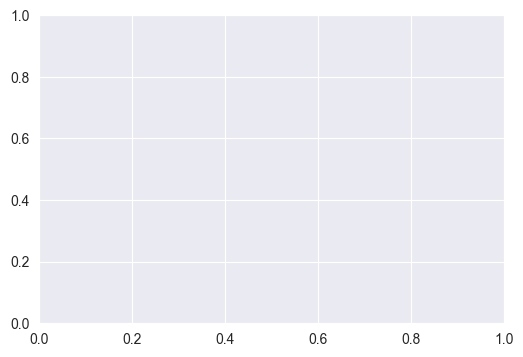

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
initail_acc = "{:.2f}".format(whole_logs[whole_logs['type']=='init']['51'].iloc[0])
g = sns.barplot(data = whole_logs[whole_logs['type'].apply(lambda x : x in ['delay','ssl'])], x = 'type',y = '51',hue = 'threshold',ax = ax)
g.axhline(float(initail_acc),linestyle ='--')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
g.set(ylim=(0, 1),ylabel= 'Acc',xlabel='Type')
plt.show()

In [ ]:
print(whole_logs[whole_logs['type'].apply(lambda x : x in ['delay','ssl'])][['threshold','type','0','45','51']].sort_values('51',ascending=False).to_latex())

\begin{tabular}{lrlrrr}
\toprule
{} &  threshold &   type &         0 &        45 &        51 \\
\midrule
10 &        0.9 &  delay &  0.729551 &  0.750067 &  0.746346 \\
11 &        0.9 &    ssl &  0.720978 &  0.744190 &  0.736754 \\
5  &        0.9 &    ssl &  0.706341 &  0.725147 &  0.722985 \\
6  &        0.8 &  delay &  0.704947 &  0.723829 &  0.719219 \\
7  &        0.8 &    ssl &  0.679647 &  0.697084 &  0.694215 \\
2  &        0.7 &  delay &  0.665831 &  0.679920 &  0.679580 \\
3  &        0.8 &    ssl &  0.646555 &  0.655613 &  0.656591 \\
5  &        0.9 &    ssl &  0.638404 &  0.646371 &  0.645630 \\
3  &        0.7 &    ssl &  0.628758 &  0.641425 &  0.638506 \\
1  &        0.7 &    ssl &  0.586272 &  0.595434 &  0.592269 \\
3  &        0.8 &    ssl &  0.524353 &  0.529988 &  0.526663 \\
1  &        0.7 &    ssl &  0.506921 &  0.503676 &  0.506418 \\
\bottomrule
\end{tabular}



C:\Users\gosia\AppData\Local\Temp\ipykernel_54652\2115227793.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(whole_logs[whole_logs['type'].apply(lambda x : x in ['delay','ssl'])][['threshold','type','0','45','51']].sort_values('51',ascending=False).to_latex())
